In [1]:
import ROOT
import numpy as np
import uproot3
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy
import time

Welcome to JupyROOT 6.24/02


In [2]:
root_file = "dav10.root"
file = uproot3.open(root_file)

In [3]:
file.keys()

[b'Truth_Vertex_PV_Selected;6',
 b'Truth_Vertex_PV_Selected;5',
 b'Reco_Vertex;4',
 b'Reco_Vertex;3',
 b'amvf;1']

In [4]:
file['amvf;1'].show()

diffx                      TStreamerSTL               asjagged(asdtype('>f4'), 10)
diffy                      TStreamerSTL               asjagged(asdtype('>f4'), 10)
diffz                      TStreamerSTL               asjagged(asdtype('>f4'), 10)
nRecoVtx                   (no streamer)              asdtype('>i4')
nTrueVtx                   (no streamer)              asdtype('>i4')
nVtxDetectorAcceptance     (no streamer)              asdtype('>i4')
nVtxReconstructable        (no streamer)              asdtype('>i4')
timeMS                     (no streamer)              asdtype('>i4')


In [5]:
file['Truth_Vertex_PV_Selected;6'].show()

event_id                   (no streamer)              asdtype('>i4')
truth_vtx_vx               TStreamerSTL               asjagged(asdtype('>f8'), 10)
truth_vtx_vy               TStreamerSTL               asjagged(asdtype('>f8'), 10)
truth_vtx_vz               TStreamerSTL               asjagged(asdtype('>f8'), 10)
truth_particle_Id          TStreamerSTL               asjagged(asdtype('>u8'), 10)
truth_particle_Type        TStreamerSTL               asjagged(asdtype('>i4'), 10)
truth_particle_process     TStreamerSTL               asjagged(asdtype('>u4'), 10)
truth_particle_vx          TStreamerSTL               asjagged(asdtype('>f8'), 10)
truth_particle_vy          TStreamerSTL               asjagged(asdtype('>f8'), 10)
truth_particle_vz          TStreamerSTL               asjagged(asdtype('>f8'), 10)
truth_particle_vt          TStreamerSTL               asjagged(asdtype('>f8'), 10)
truth_particle_p           TStreamerSTL               asjagged(asdtype('>f8'), 10)
truth_particle_px 

In [6]:
file['Reco_Vertex;4'].show()

event_id                   (no streamer)              asdtype('>i4')
reco_vtx_vx                TStreamerSTL               asjagged(asdtype('>f8'), 10)
reco_vtx_vy                TStreamerSTL               asjagged(asdtype('>f8'), 10)
reco_vtx_vz                TStreamerSTL               asjagged(asdtype('>f8'), 10)
reco_vtx_fitquality_chiSquared
                           TStreamerSTL               asjagged(asdtype('>f8'), 10)
reco_vtx_fitquality_nDoF   TStreamerSTL               asjagged(asdtype('>f8'), 10)
reco_vtx_err_vx_vx         TStreamerSTL               asjagged(asdtype('>f8'), 10)
reco_vtx_err_vx_vy         TStreamerSTL               asjagged(asdtype('>f8'), 10)
reco_vtx_err_vx_vz         TStreamerSTL               asjagged(asdtype('>f8'), 10)
reco_vtx_err_vy_vy         TStreamerSTL               asjagged(asdtype('>f8'), 10)
reco_vtx_err_vy_vz         TStreamerSTL               asjagged(asdtype('>f8'), 10)
reco_vtx_err_vz_vz         TStreamerSTL               asjagged(asdtype

In [7]:
event_amvf = [file["amvf;1"]["nRecoVtx"].array(), 
              file["amvf;1"]["nTrueVtx"].array(),
              file["amvf;1"]["nVtxReconstructable"].array(),
              file["amvf;1"]["diffx"].array(),
              file["amvf;1"]["diffy"].array(),
              file["amvf;1"]["diffz"].array()]

event_truth = [file["Truth_Vertex_PV_Selected;6"]["event_id"].array(),
               file["Truth_Vertex_PV_Selected;6"]["truth_vtx_vx"].array(),
               file["Truth_Vertex_PV_Selected;6"]["truth_vtx_vy"].array(),
               file["Truth_Vertex_PV_Selected;6"]["truth_vtx_vz"].array(),
               file["Truth_Vertex_PV_Selected;6"]["truth_vtx_fitted_trk_d0"].array(),
               file["Truth_Vertex_PV_Selected;6"]["truth_vtx_fitted_trk_z0"].array(),
               file["Truth_Vertex_PV_Selected;6"]["truth_vtx_fitted_trk_phi"].array(),
               file["Truth_Vertex_PV_Selected;6"]["truth_vtx_fitted_trk_theta"].array(),
               file["Truth_Vertex_PV_Selected;6"]["truth_vtx_fitted_trk_qp"].array(),
               file["Truth_Vertex_PV_Selected;6"]["truth_vtx_fitted_trk_time"].array(),
               file["Truth_Vertex_PV_Selected;6"]["truth_vtx_fitted_trk_vtxID"].array(),
               file["Truth_Vertex_PV_Selected;6"]["truth_vtx_fitted_trk_err_z0"].array()]

event_reco = [file["Reco_Vertex;4"]["event_id"].array(),
              file["Reco_Vertex;4"]["reco_vtx_vx"].array(),
              file["Reco_Vertex;4"]["reco_vtx_vy"].array(),
              file["Reco_Vertex;4"]["reco_vtx_vz"].array(),
              file["Reco_Vertex;4"]["reco_vtx_fitted_trk_d0"].array(),
              file["Reco_Vertex;4"]["reco_vtx_fitted_trk_z0"].array(),
              file["Reco_Vertex;4"]["reco_vtx_fitted_trk_phi"].array(),
              file["Reco_Vertex;4"]["reco_vtx_fitted_trk_theta"].array(),
              file["Reco_Vertex;4"]["reco_vtx_fitted_trk_qp"].array(),
              file["Reco_Vertex;4"]["reco_vtx_fitted_trk_time"].array(),
              file["Reco_Vertex;4"]["reco_vtx_fitted_trk_vtxID"].array(), 
              file["Reco_Vertex;4"]["reco_vtx_fitquality_chiSquared"].array(),
              file["Reco_Vertex;4"]["reco_vtx_fitted_trk_trackWeight"].array(),
              file["Reco_Vertex;4"]["reco_vtx_err_vz_vz"].array()]

event_amvf = np.expand_dims(event_amvf, axis = -1)
event_amvf = event_amvf.transpose((1,0,2))
event_amvf = np.squeeze(event_amvf, axis= (2,))

event_truth = np.expand_dims(event_truth, axis = -1)
event_truth = event_truth.transpose((1,0,2))
event_truth = np.squeeze(event_truth, axis= (2,))

event_reco = np.expand_dims(event_reco, axis = -1)
event_reco = event_reco.transpose((1,0,2))
event_reco = np.squeeze(event_reco, axis= (2,))

In [8]:
_nRecoVtx, _nTrueVtx, _nVtxReconstructible, _diffx, _diffy, _diffz = 0, 1, 2, 3, 4, 5
_event_id, _truth_vtx_vx, _truth_vtx_vy, _truth_vtx_vz, _truth_trk_d0, _truth_trk_z0, _truth_trk_phi, _truth_trk_theta, _truth_trk_qp, _truth_trk_time, _truth_trk_vtxid, _truth_ptc_p, _truth_ptc_px, _truth_ptc_py, _truth_ptc_pz, _truth_ptc_pt = 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15
_event_id, _reco_vtx_vx, _reco_vtx_vy, _reco_vtx_vz, _reco_trk_d0, _reco_trk_z0, _reco_trk_phi, _reco_trk_theta, _reco_trk_qp, _reco_trk_time, _reco_trk_vtxid, _reco_chi2, _reco_trkweight = 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12

In [9]:
# save truth and reco tracks information into [[[[1, 1, 1, 1, 1], [1, 1, 1, 1, 1]]]]
time_start = time.time()
vtx_id_reco, vtx_reco, trk_reco, trk_weight_reco, trk_weight_sum_reco, hs_trk_reco, hs_vtx_reco = [], [], [], [], [], [], []

for i in range(len(event_reco)):
    num_trk = np.bincount(event_reco[i][_reco_trk_vtxid])
    vtx_trk_info_tmp, vtx_trk_weight_tmp, trk_weight_sum_tmp, trk_weight_sum_reco_vtx_tmp, vtx_reco_tmp = [], [], [], [], []
    trk_count, m0 = 0, 0
    for j in range(len(event_reco[i][_reco_vtx_vx])):
        trk_info_tmp, trk_weight_tmp = [], []

        pt = 1 / (np.abs(event_reco[i][_reco_trk_qp][trk_count:(trk_count+num_trk[j])])) * np.sin(event_reco[i][7][trk_count:(trk_count+num_trk[j])])
        mpt = sum([i ** 2 for i in pt])
        trk_weight_sum_reco_vtx_tmp.append(sum(event_reco[i][_reco_trkweight][trk_count:(trk_count + num_trk[j])]))
        vtx_reco_tmp.append([event_reco[i][_reco_vtx_vx][j], event_reco[i][_reco_vtx_vy][j], event_reco[i][_reco_vtx_vz][j]])
        
        for k in range(num_trk[j]):
            trk_info_tmp.append([event_reco[i][_reco_trk_d0][trk_count + k], event_reco[i][_reco_trk_z0][trk_count + k], event_reco[i][_reco_trk_phi][trk_count + k], 
                                 event_reco[i][_reco_trk_theta][trk_count + k], event_reco[i][_reco_trk_qp][trk_count + k]])
            trk_weight_tmp.append(event_reco[i][_reco_trkweight][trk_count + k])
        
        if mpt > m0:
            hs_trk_tmp = []
            hs_vtx_tmp = [event_reco[i][_reco_vtx_vx][j], event_reco[i][_reco_vtx_vy][j], event_reco[i][_reco_vtx_vz][j]]
            for k in range(num_trk[j]):
                hs_trk_tmp.append([event_reco[i][_reco_trk_d0][trk_count + k], event_reco[i][_reco_trk_z0][trk_count + k], event_reco[i][_reco_trk_phi][trk_count + k], 
                                     event_reco[i][_reco_trk_theta][trk_count + k], event_reco[i][_reco_trk_qp][trk_count + k]])
            vtx_id_reco_tmp = j
            m0 = mpt
            
        vtx_trk_info_tmp.append(trk_info_tmp)
        vtx_trk_weight_tmp.append(trk_weight_tmp)
        
        trk_count += num_trk[j]
        
    vtx_reco.append(vtx_reco_tmp)
    vtx_id_reco.append(vtx_id_reco_tmp)
    trk_reco.append(vtx_trk_info_tmp)
    trk_weight_reco.append(vtx_trk_weight_tmp)
    trk_weight_sum_reco.append(trk_weight_sum_reco_vtx_tmp)
    hs_trk_reco.append(hs_trk_tmp)
    hs_vtx_reco.append(hs_vtx_tmp)

time_elapsed = (time.time() - time_start)
print("time_elapsed:", time_elapsed, 'seconds')

time_elapsed: 11.576621770858765 seconds


In [10]:
time_start = time.time()
vtx_truth, vtx_truth_vz, trk_truth, hs_trk_truth, pt_truth, hs_vtx_truth = [], [], [], [], [], []
for i in range(len(event_truth)):
    num_trk = np.bincount(event_truth[i][_truth_trk_vtxid])
    vtx_trk_info_tmp, momentum, vtx_truth_vz_tmp, vtx_truth_tmp = [], [], [], []
    trk_count, m0 = 0, 0
    for j in range(len(event_truth[i][_truth_vtx_vx])):
        trk_info_tmp = []
        pt = 1 / (np.abs(event_truth[i][_truth_trk_qp][trk_count:(trk_count+num_trk[j])])) * np.sin(event_truth[i][_truth_trk_theta][trk_count:(trk_count+num_trk[j])])
        momentum.append(pt)
        mpt = sum([i ** 2 for i in pt])
        
        vtx_truth_vz_tmp.append(event_truth[i][_truth_vtx_vz][j])
        vtx_truth_tmp.append([event_truth[i][_truth_vtx_vx][j], event_truth[i][_truth_vtx_vy][j], event_truth[i][_truth_vtx_vz][j]])
        
        for k in range(num_trk[j]):
            trk_info_tmp.append([event_truth[i][_truth_trk_d0][trk_count + k], event_truth[i][_truth_trk_z0][trk_count + k], event_truth[i][_truth_trk_phi][trk_count + k], 
                                 event_truth[i][_truth_trk_theta][trk_count + k], event_truth[i][_truth_trk_qp][trk_count + k]])
        
        if mpt > m0:
            hs_trk_tmp = []
            hs_vtx_tmp = [event_truth[i][_truth_vtx_vx][j], event_truth[i][_truth_vtx_vy][j], event_truth[i][_truth_vtx_vz][j]]
            for k in range(num_trk[j]):
                hs_trk_tmp.append([event_truth[i][_truth_trk_d0][trk_count + k], event_truth[i][_truth_trk_z0][trk_count + k], event_truth[i][_truth_trk_phi][trk_count + k], 
                                 event_truth[i][_truth_trk_theta][trk_count + k], event_truth[i][_truth_trk_qp][trk_count + k]])
            m0 = mpt
        
        vtx_trk_info_tmp.append(trk_info_tmp)
        trk_count += num_trk[j]
    vtx_truth.append(vtx_truth_tmp)
    vtx_truth_vz.append(vtx_truth_vz_tmp)
    pt_truth.append(momentum)
    trk_truth.append(vtx_trk_info_tmp)
    hs_trk_truth.append(hs_trk_tmp)
    hs_vtx_truth.append(hs_vtx_tmp)
    

time_elapsed = (time.time() - time_start)
print("time_elapsed:", time_elapsed, 'seconds')

/tmp/ipykernel_39/3736404149.py:9: RuntimeWarning: divide by zero encountered in true_divide
  pt = 1 / (np.abs(event_truth[i][_truth_trk_qp][trk_count:(trk_count+num_trk[j])])) * np.sin(event_truth[i][_truth_trk_theta][trk_count:(trk_count+num_trk[j])])
/tmp/ipykernel_39/3736404149.py:9: RuntimeWarning: invalid value encountered in multiply
  pt = 1 / (np.abs(event_truth[i][_truth_trk_qp][trk_count:(trk_count+num_trk[j])])) * np.sin(event_truth[i][_truth_trk_theta][trk_count:(trk_count+num_trk[j])])
/tmp/ipykernel_39/3736404149.py:9: RuntimeWarning: overflow encountered in true_divide
  pt = 1 / (np.abs(event_truth[i][_truth_trk_qp][trk_count:(trk_count+num_trk[j])])) * np.sin(event_truth[i][_truth_trk_theta][trk_count:(trk_count+num_trk[j])])


time_elapsed: 10.88123869895935 seconds


In [11]:
# testing
print(len(vtx_id_reco))
print(vtx_id_reco[0:100])
print(vtx_reco[0:2])
hs_vtx_reco[0:2]

10000
[0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0]
[[[0.01900918047030764, 0.005292189835718553, 46.512036453069925], [0.020431426271770192, -0.011986555119816167, 45.88227908027714], [-0.0025768596463819904, -2.704390236729637e-05, 91.72883197211489]], [[0.026837884703797388, -0.02312857042144012, 8.481661281052371], [-0.005407367456152556, -0.0018632956896897923, 72.30154291168819], [0.0033042864386523263, 0.018135763307476793, -129.39196601938457], [-0.0314916431274348, 0.016902985962541806, 77.87100448435564], [-0.13367072614434505, -0.0406255875074244, 35.469937841547406], [-0.00612345718444729, 0.04628245087554106, 113.82247306381677], [-0.009742255579261894, -0.09149477376502091, -48.687192219495095], [0.02299129897622798, -0.0

[[0.01900918047030764, 0.005292189835718553, 46.512036453069925],
 [0.026837884703797388, -0.02312857042144012, 8.481661281052371]]

In [110]:
trk_truth[1][1][0]
# trk_truth[_event][_vtx][_trk]

[0.012306297197937965,
 77.68561553955078,
 -0.10236044973134995,
 0.1662713885307312,
 -0.33090803027153015]

mean= 0.9934409229049306
standard deviation= 0.027140979659441435


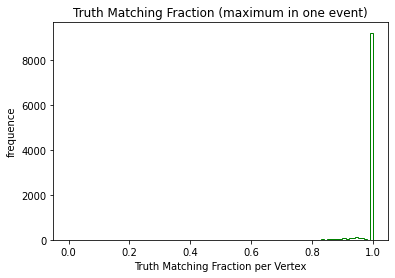

time_elapsed 7.903313159942627 seconds


In [12]:
time_start = time.time()
m = []
for l in range(len(trk_truth)):
    fraction = []
    for j in range(len(trk_truth[l])):
        num_trk_associated = []
        for k in range(len(trk_reco[l])):
            num_trk_associated.append(len([i for i, val in enumerate(trk_reco[l][k]) if val in trk_truth[l][j]]))
        fraction.append(max(num_trk_associated)/len(trk_truth[l][j])) # change to vertex
    m.append(max(fraction))
        
(mean, stadev) = norm.fit(m)
print('mean=', mean)
print('standard deviation=', stadev)
bin = np.linspace(0, 1, 101)
plt.hist(m, bins=bin, color='green', histtype='step', label='number of vertex')
plt.title('Truth Matching Fraction (maximum in one event)')
plt.xlabel('Truth Matching Fraction per Vertex')
plt.ylabel('frequence')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
time_elapsed = (time.time() - time_start)
print('time_elapsed', time_elapsed, 'seconds')

In [104]:
#[d0, z0, theta, phi, q/p]
truth_vtx_trk = [[1, 2, 3, 4, 5], [0, 3, 5, 7, 2], [6, 6, 6, 6, 6]]
reco_vtx_trk = [[3, 34, 7, 2, 7], [1, 1, 3, 4, 5], [6, 6, 6, 6, 6], [1, 2, 3, 4, 5]]
len([i for i, val in enumerate(truth_vtx_trk) if val in reco_vtx_])/len(list1)

0.6666666666666666

In [94]:
list3 = [1, 2, 3, 4, 5, 6, 7]
print([i for i in list3])
[i ** 2 for i in list3]

[1, 2, 3, 4, 5, 6, 7]


[1, 4, 9, 16, 25, 36, 49]

In [95]:
[i**2 for i in list3 if i >= 4]

[16, 25, 36, 49]

In [62]:
time_start = time.time()
truth_match_matrix, m = [], []
for l in range(len(trk_truth)):
    truth_match_matrix_tmp = np.zeros((len(event_truth[l][_truth_vtx_vx]), len(event_reco[l][_reco_vtx_vx])))
    for j in range(len(trk_truth[l])):
        num_trk_associated = []
        for k in range(len(trk_reco[l])):
            truth_match_matrix_tmp[j, k] = (len([i for i, val in enumerate(trk_reco[l][k]) if val in trk_truth[l][j]])/len(trk_truth[l][j]))
            
    truth_match_matrix.append(truth_match_matrix_tmp)
    
time_elapsed = (time.time() - time_start)
print('time_elapsed', time_elapsed, 'seconds')

time_elapsed 8.628681659698486 seconds


In [112]:
truth_match_matrix[1]

array([[0.84615385, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.10576923],
       [0.        , 0.        , 0.        , 0.92857143, 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.5       ,
        0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.85714286,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.75      , 0.        ]])

mean_event= 0.9934409229049306
standard deviation_event= 0.027140979659441435


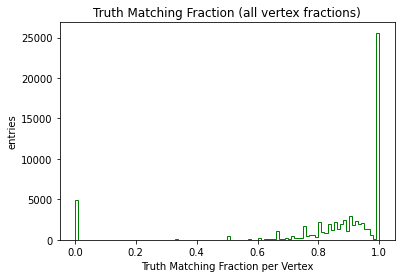

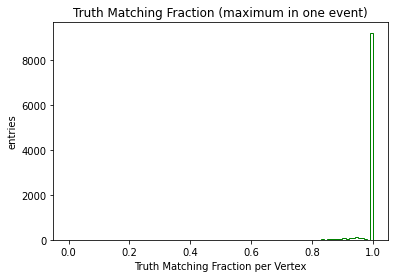

time_elapsed 999.9659404754639 seconds


In [77]:
fig_vtx, ax_vtx = plt.subplots()
fig_event, ax_event = plt.subplots()

m_event, m_vtx = [], []
for l in range(len(truth_match_matrix)):
    m_event.append(np.amax(truth_match_matrix[l]))
    for j in range(len(truth_match_matrix[l])):
        m_vtx.append(max(truth_match_matrix[l][j]))
        
(mean, stadev) = norm.fit(m_event)
print('mean_event=', mean)
print('standard deviation_event=', stadev)
bin = np.linspace(0, 1, 101)
ax_event.hist(m_event, bins=bin, color='green', histtype='step', label='number of vertex')
ax_vtx.hist(m_vtx, bins=bin, color='green', histtype='step')

ax_event.set_title('Truth Matching Fraction (maximum in one event)')
ax_vtx.set_title('Truth Matching Fraction (all vertex fractions)')

ax_event.set_xlabel("Truth Matching Fraction per Vertex")
ax_event.set_ylabel("entries")

ax_vtx.set_xlabel("Truth Matching Fraction per Vertex")
ax_vtx.set_ylabel("entries")

plt.show()
time_elapsed = (time.time() - time_start)
print('time_elapsed', time_elapsed, 'seconds')

In [13]:
print('number of data inputs', len(m))

number of data inputs 10000


mean= 0.8459593639190216
standard deviation= 0.255557954067621


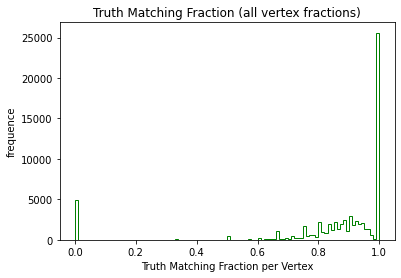

time_elapsed 8.100322246551514 seconds


In [14]:
time_start = time.time()
m, vtx0 = [], []
for l in range(len(trk_truth)):
    for j in range(len(trk_truth[l])):
        num_trk_associated = []
        for k in range(len(trk_reco[l])):
            # trk_common = [a for a in trk_reco[i][j] if a in trk_truth[i][j]]
            num_trk_associated.append(len([i for i, val in enumerate(trk_reco[l][k]) if val in trk_truth[l][j]]))
        m.append(max(num_trk_associated)/len(trk_truth[l][j])) # change to vertex
        
(mean, stadev) = norm.fit(m)
print('mean=', mean)
print('standard deviation=', stadev)
bin = np.linspace(0, 1, 101)
plt.hist(m, bins=bin, color='green', histtype='step', label='number of vertex')
plt.title('Truth Matching Fraction (all vertex fractions)')
plt.xlabel('Truth Matching Fraction per Vertex')
plt.ylabel('frequence')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
time_elapsed = (time.time() - time_start)
print('time_elapsed', time_elapsed, 'seconds')

In [15]:
print('number of input data:', len(m))

number of input data: 68777


In [16]:
print(hs_vtx_truth[0])
print(len(trk_truth[0][1]))

[0.00881008617579937, 0.01478538941591978, 46.51725387573242]
4


mean= 0.8363714272929988
standard deviation= 0.08778067984522908


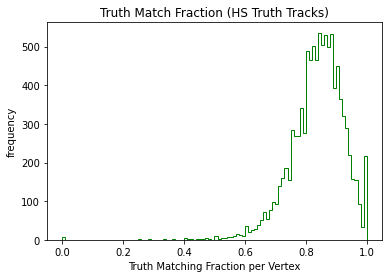

time_elapsed: 2.5298640727996826 seconds
10000


In [17]:
# Reco_HS_Efficiency = Number of Reconstructable truth HS vertex which is associated to Reconstructed Vertex / Number of Reconstructable truth HS vertex
time_start = time.time()
m, hs_vtx_truth_associated_event_num = [], []
for l in range(len(hs_trk_truth)):
    num_trk_associated = []
    
    for k in range(len(trk_reco[l])):
        # trk_common = [a for a in trk_reco[i][j] if a in trk_truth[i][j]]
        num_trk_associated.append(len([i for i, val in enumerate(trk_reco[l][k]) if val in hs_trk_truth[l]]))
        
    max_hs_fraction = max(num_trk_associated)/len(hs_trk_truth[l])
    m.append(max_hs_fraction)
    if max_hs_fraction > 0.7:
        hs_vtx_truth_associated_event_num.append(l)
    
(mean, stadev) = norm.fit(m)
print('mean=', mean)
print('standard deviation=', stadev)
bin = np.linspace(0, 1, 101)
plt.hist(m, bins=bin, color='green', histtype='step', label='number of vertex')
plt.title('Truth Match Fraction (HS Truth Tracks)')
plt.xlabel('Truth Matching Fraction per Vertex')
plt.ylabel('frequency')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
time_elapsed = (time.time() - time_start)
print('time_elapsed:',time_elapsed, 'seconds')
print(len(m))

In [18]:
print('hs_fraction > 0.7 out of 10,000:', len(hs_vtx_truth_associated_event_num))

hs_fraction > 0.7 out of 10,000: 9383


In [19]:
def dist_cal(list1, list2):
    dist = np.sqrt((list1[0]-list2[0])**2 + (list1[1]-list2[1])**2 + (list1[2]-list2[2])**2)
    return dist

def print_out(list1, list2):
    print("diff_x:", list1[0]-list2[0], "diff_y", list1[1]-list2[1], "diff_z", list1[2]-list2[2])

In [20]:
# testing
m = []
for i in range(10000):
    hs_dist = dist_cal(hs_vtx_truth[i], hs_vtx_reco[i])
    pu_dist = []
    for j in range(len(vtx_reco[i])):
        pu_dist.append(dist_cal(hs_vtx_truth[i], vtx_reco[i][j]))
    
    if hs_dist <= 0.1 and min(pu_dist) == hs_dist:
        m.append(1)
print(len(m))

9522


In [21]:
# testing
m = []
for i in hs_vtx_truth_associated_event_num:
    hs_dist = dist_cal(hs_vtx_truth[i], hs_vtx_reco[i])
    pu_dist = []
    for j in range(len(vtx_reco[i])):
        pu_dist.append(dist_cal(hs_vtx_truth[i], vtx_reco[i][j]))
    
    if hs_dist <= 0.1:
        m.append(1)
print(len(m))

9047


In [22]:
# Testing 
for l in range(3):
    num_trk_associated = []
    for k in range(len(trk_reco[l])):
        # trk_common = [a for a in trk_reco[i][j] if a in trk_truth[i][j]]
        num_trk_associated.append(len([i for i, val in enumerate(hs_trk_truth[l])if val in trk_reco[l][k]]))
    
    vtx_reco_tmp = vtx_reco[l]
    num_trk_associated, vtx_reco_tmp = zip(*sorted(zip(num_trk_associated, vtx_reco_tmp), reverse=True))
    print(num_trk_associated, vtx_reco_tmp)

(50, 27, 0) ([0.01900918047030764, 0.005292189835718553, 46.512036453069925], [0.020431426271770192, -0.011986555119816167, 45.88227908027714], [-0.0025768596463819904, -2.704390236729637e-05, 91.72883197211489])
(88, 11, 0, 0, 0, 0, 0, 0) ([0.026837884703797388, -0.02312857042144012, 8.481661281052371], [0.02299129897622798, -0.027495341237964155, 7.875863620143358], [0.0033042864386523263, 0.018135763307476793, -129.39196601938457], [-0.005407367456152556, -0.0018632956896897923, 72.30154291168819], [-0.00612345718444729, 0.04628245087554106, 113.82247306381677], [-0.009742255579261894, -0.09149477376502091, -48.687192219495095], [-0.0314916431274348, 0.016902985962541806, 77.87100448435564], [-0.13367072614434505, -0.0406255875074244, 35.469937841547406])
(34, 0, 0, 0, 0, 0, 0, 0) ([-0.0128344920978547, -0.003256561329363805, -21.381735345813166], [0.4416936028195, -0.09308780625943514, -63.72217863370243], [0.009526229241830109, 0.015430959879685346, -61.71827950747761], [0.0022344

# Reconstruction Efficiency
### To successfully reconstruct a HS, 1 test is done: 
 - |reco(max(number of tracks)) - truth_HS| < 0.1 mm
 
### Local pile-up density
 - local pile-up density near a vertex, defined as the number of generated vertices per unit length within a symmetrical ±2 mm longitudinal window

/tmp/ipykernel_39/2339860997.py:36: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  TEff1.Fill(Reco, localPUDensity);
/tmp/ipykernel_39/2339860997.py:37: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  TEff2.Fill(Reco, localPUDensity);
/tmp/ipykernel_39/2339860997.py:38: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  TEff3.Fill(Reco, localPUDensity);


time_elapsed: 3.5895283222198486 seconds


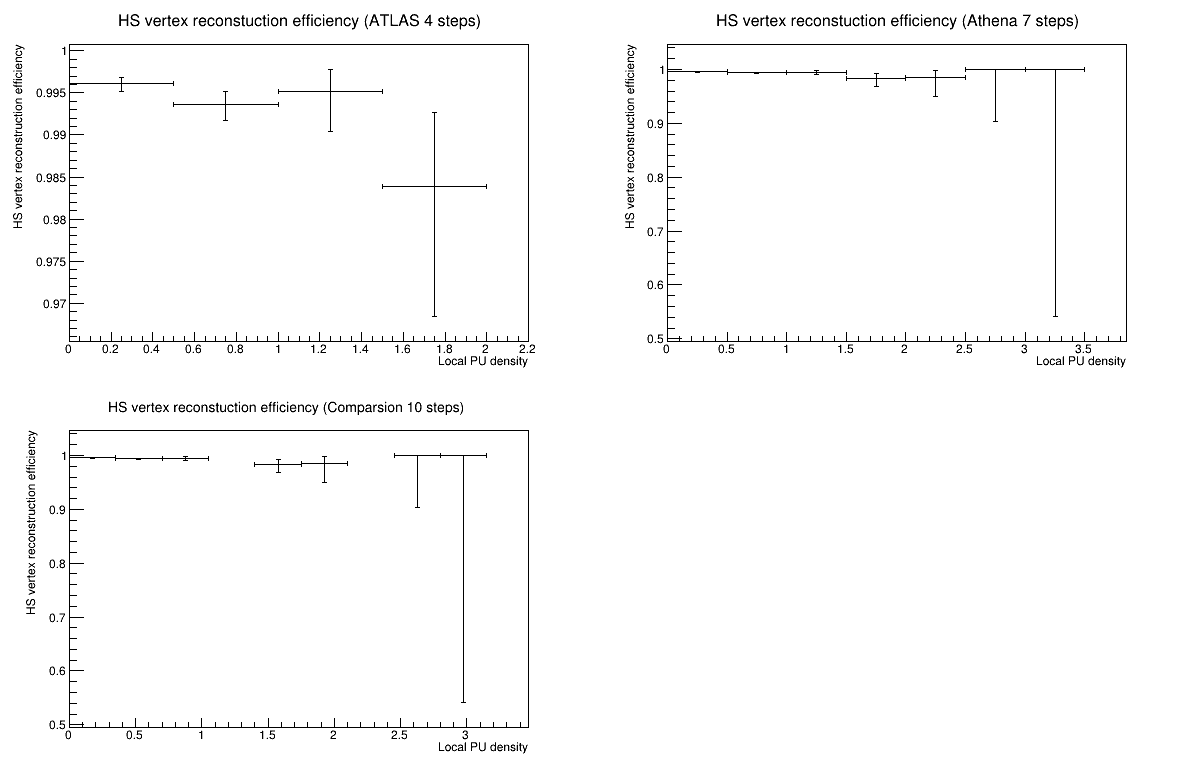

In [23]:
time_start = time.time()
c = ROOT.TCanvas("fillhist", "title1", 1200, 800)
#c.SetFillStyle(1001)
TEff1 = ROOT.TEfficiency("eff", "HS vertex reconstuction efficiency (ATLAS 4 steps);Local PU density;HS vertex reconstruction efficiency", 4, 0, 2)
TEff2 = ROOT.TEfficiency("eff", "HS vertex reconstuction efficiency (Athena 7 steps);Local PU density;HS vertex reconstruction efficiency", 7, 0, 3.5)
TEff3 = ROOT.TEfficiency("eff", "HS vertex reconstuction efficiency (Comparsion 10 steps);Local PU density;HS vertex reconstruction efficiency", 10, 0, 3.5)

sel_loop = []
long_window = 2
for l in range(len(vtx_truth)):
    #localPUDensity
    nTracksInWindow = 0
    
    long_dist = vtx_truth_vz[l]
    long_dist = [np.abs(long_dist[i]-j) for i in range(len(long_dist)) for j in long_dist[i+1:]]
    nTracksInWindow = len([i for i in long_dist if i < long_window])
    
    localPUDensity = nTracksInWindow/long_window
    
    #Reco Test
 
    num_trk_associated = []
    for k in range(len(trk_reco[l])):
        # trk_common = [a for a in trk_reco[i][j] if a in trk_truth[i][j]]
        num_trk_associated.append(len([i for i, val in enumerate(hs_trk_truth[l])if val in trk_reco[l][k]]))
    
    vtx_reco_tmp = vtx_reco[l]
    num_trk_associated, vtx_reco_tmp = zip(*sorted(zip(num_trk_associated, vtx_reco_tmp), reverse=True))
    bestRecoHSvtx_truth = vtx_reco_tmp[0]
    
    hs_dist = dist_cal(hs_vtx_truth[l], bestRecoHSvtx_truth)
    if hs_dist <= 0.1:
        sel_loop.append(l)

    Reco = hs_dist <= 0.1 
    TEff1.Fill(Reco, localPUDensity);
    TEff2.Fill(Reco, localPUDensity);
    TEff3.Fill(Reco, localPUDensity);

c.Divide(2, 2)
c.cd(1); TEff1.Draw()
c.cd(2); TEff2.Draw()
c.cd(3); TEff3.Draw()
c.Draw()

time_elapsed = (time.time() - time_start)
print('time_elapsed:',time_elapsed, 'seconds')

In [24]:
# testing
t1 = [1, 2, 4, 8, 16, 32, 64, 128, 256]
result = [np.abs(t1[i]-j) for i in range(len(t1)) for j in t1[i+1:]]
print(result)
dist = []
for j in range(len(t1)-1):
    for k in range(j+1, len(t1)):
        dist.append(np.abs(t1[j]-t1[k]))
print(dist)


[1, 3, 7, 15, 31, 63, 127, 255, 2, 6, 14, 30, 62, 126, 254, 4, 12, 28, 60, 124, 252, 8, 24, 56, 120, 248, 16, 48, 112, 240, 32, 96, 224, 64, 192, 128]
[1, 3, 7, 15, 31, 63, 127, 255, 2, 6, 14, 30, 62, 126, 254, 4, 12, 28, 60, 124, 252, 8, 24, 56, 120, 248, 16, 48, 112, 240, 32, 96, 224, 64, 192, 128]


# Selection Efficiency
### To successfully selection, 1 test is done: 
 - Reconstructed Vertex with max(PT^2) = [max(number of tracks) - HS <= 0.1]
 
#### sidenotes: ATLAS definition - the reconstructed vertex with highest pT2 is the one containing the largest total weight from true HS tracks.
 - don't have a truth track weight output

Warning in <TCanvas::Constructor>: Deleting canvas with same name: fillhist


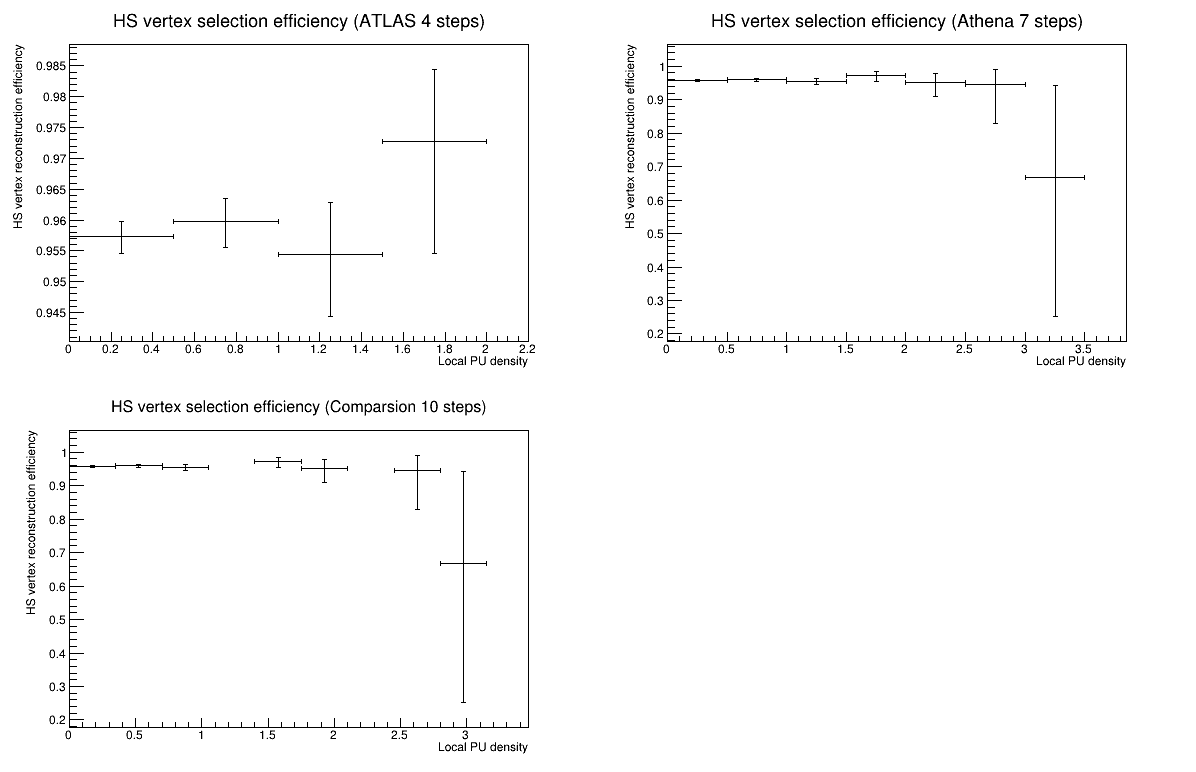

In [25]:
time_start = time.time()
c = ROOT.TCanvas("fillhist", "title", 1200, 800)
#c.SetFillStyle(1001)
TEff1 = ROOT.TEfficiency("eff", "HS vertex selection efficiency (ATLAS 4 steps);Local PU density;HS vertex reconstruction efficiency", 4, 0, 2)
TEff2 = ROOT.TEfficiency("eff", "HS vertex selection efficiency (Athena 7 steps);Local PU density;HS vertex reconstruction efficiency", 7, 0, 3.5)
TEff3 = ROOT.TEfficiency("eff", "HS vertex selection efficiency (Comparsion 10 steps);Local PU density;HS vertex reconstruction efficiency", 10, 0, 3.5)

long_window = 2
for l in sel_loop:
    #localPUDensity
    nTracksInWindow = 0
    
    long_dist = vtx_truth_vz[l]
    long_dist = [np.abs(long_dist[i]-j) for i in range(len(long_dist)) for j in long_dist[i+1:]]
    nTracksInWindow = len([i for i in long_dist if i < long_window])
    
    localPUDensity = nTracksInWindow/long_window
    
    #Sel Test
     
    num_trk_associated = []
    for k in range(len(trk_reco[l])):
        # trk_common = [a for a in trk_reco[i][j] if a in trk_truth[i][j]]
        num_trk_associated.append(len([i for i, val in enumerate(hs_trk_truth[l])if val in trk_reco[l][k]]))
    
    vtx_reco_tmp = vtx_reco[l]
    num_trk_associated, vtx_reco_tmp = zip(*sorted(zip(num_trk_associated, vtx_reco_tmp), reverse=True))
    bestRecoHSvtx_truth = vtx_reco_tmp[0]
    

    Sel = bestRecoHSvtx_truth == hs_vtx_reco[l]
    TEff1.Fill(Sel, localPUDensity);
    TEff2.Fill(Sel, localPUDensity);
    TEff3.Fill(Sel, localPUDensity);

c.Divide(2, 2)
c.cd(1); TEff1.Draw()
c.cd(2); TEff2.Draw()
c.cd(3); TEff3.Draw()
c.Draw()

# Classifying vertices
#### CLEAN: At least 70% of the total track weight in the reconstructed vertex originates from a single simulated pp interaction.
#### MERGED: Less than 70% of the total track weight in the reconstructed vertex originates from any single simulated pp interaction. Hence, two or more simulated interactions contribute significantly to the accumulated track weight.
#### SPLIT: A single simulated pp interaction contributes the largest track weight to two or more reconstructed vertices. The reconstructed vertex with the largest track pt^2 is classed as either CLEAN or MERGED, whilst the other(s) are labelled SPLIT.
#### FAKE: Fake tracks contribute more weight to the reconstructed vertex than any simulated pp interaction. 

clean: 68240
merged: 56
split: 2323
checking total input of reconstructed vertices: 70619


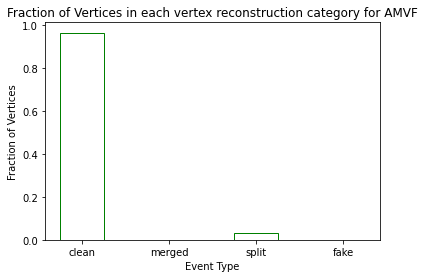

time_elapsed: 7.621322870254517 seconds


In [26]:
time_start= time.time()
clean, merged, split, fake = 0, 0, 0, 0
matched, high_pu, low_pu, pure_pu = 0, 0, 0, 0
fake = 0 # tested in below cells
num_vtx_input_check = 0
for l in range(len(event_reco)):
    fraction = []
    for j in range(len(trk_reco[l])):
        num_trk_associated = []
        for k in range(len(trk_truth[l])):
            num_trk_associated.append(len([i for i, val in enumerate(trk_truth[l][k]) if val in trk_reco[l][j]]))
        fraction.append(max(num_trk_associated)/len(trk_reco[l][j])) # change to vertex
    num_vtx_input_check += len(fraction)
    
    hs_reco_fraction = fraction[vtx_id_reco[l]]
    fraction.pop(vtx_id_reco[l])
    if hs_reco_fraction >= 0.7:
        clean += 1
        if trk_weight_sum_reco[l][vtx_id_reco[l]]/sum(trk_weight_sum_reco[l]) <= 0.5:
            matched += 1
    else:
        merged += 1
        if trk_weight_sum_reco[l][vtx_id_reco[l]]/sum(trk_weight_sum_reco[l]) > 0.5:
            high_pu += 1
        elif 0.01 < trk_weight_sum_reco[l][vtx_id_reco[l]]/sum(trk_weight_sum_reco[l]) <= 0.5:
            low_pu += 1
            
    if trk_weight_sum_reco[l][vtx_id_reco[l]]/sum(trk_weight_sum_reco[l]) < 0.01:
        pure_pu += 1
    clean += len([i for i in fraction if i >= 0.7])
    split += len([i for i in fraction if i < 0.7])

        
print('clean:', clean)
print('merged:', merged)
print('split:', split)
print('checking total input of reconstructed vertices:', num_vtx_input_check)

data = {'clean': clean/num_vtx_input_check, 'merged': merged/num_vtx_input_check, 'split': split/num_vtx_input_check, 'fake': fake/num_vtx_input_check}
pu = list(data.keys())
fra = list(data.values())
plt.bar(pu, fra, fill=False, edgecolor='g', width=0.5)
plt.xlabel('Event Type', fontsize=10)
plt.ylabel('Fraction of Vertices', fontsize=10)
plt.title("Fraction of Vertices in each vertex reconstruction category for AMVF", fontsize=12)
plt.show()
time_elapsed = (time.time() - time_start)
print('time_elapsed:',time_elapsed, 'seconds')

In [27]:
print(sum(trk_weight_reco[0][0]))
print(trk_weight_sum_reco[0])
print(merged)

41.48982406607285
[41.48982406607285, 12.133453282288393, 3.3552302810047117]
56


In [28]:
# checking if there exists fake vertices.
suc = []
for i in range(len(event_reco)):
    num_trk = len(event_reco[i][_reco_trk_vtxid])
    trk_weight_tmp = len((event_reco[i][_reco_trkweight]))
    if num_trk != trk_weight_tmp:
        print("fake")
    else:
        suc.append(1)
print(len(suc))

10000


In [29]:
# testing 
total = 0 
for i in range(10000):
    total += len(vtx_reco[i])
print(total, m)

70619 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

# Classifying Events
#### CLEAN/MATCHED: the event contains a CLEAN reconstructed vertex originating from the true HS interaction, and the HS interaction does not contribute more than 50% of the accumulated track weight to any other vertex. 
#### LOWPU (low pile-up): the event contains a MERGED vertex with at least 50% of the accumulated track weight coming from the simulated HS interaction.
#### HIGHPU (high pile-up): the event contains a MERGED vertex with its main contribution coming from a simulated pile-up interaction, and in which the HS interaction contributes between 1% and 50% of the accumulated track weight. 
#### PUREPU (pure pile-up): the event does not contain any reconstructed vertex with at least 1% accumulated track weight from the HS interaction.

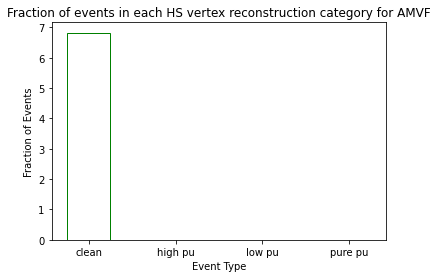

In [30]:

data = {'clean': clean/len(event_reco), 'high pu': high_pu/len(event_reco), 'low pu': low_pu/len(event_reco), 'pure pu': pure_pu/len(event_reco)}
pu = list(data.keys())
fra = list(data.values())
plt.bar(pu, fra, fill=False, edgecolor='g', width=0.5)
plt.xlabel('Event Type', fontsize=10)
plt.ylabel('Fraction of Events', fontsize=10)
plt.title("Fraction of events in each HS vertex reconstruction category for AMVF", fontsize=12)
plt.show()